Welcome to the fifth Lab session of the "Advanced algorithmics and graph theory with Python" MOOC. In this Lab you will learn how to implement a greedy algorithm to approximately solve the Traveling Salesman Problem.

The main objective of this Lab is to:
* Write and analyse a greedy algorithm to approximately solve an NP-complete problem.
* Compare approximate solutions to a problem in terms of accuracy and performance.

Based on what we learned in the previous Labs, we will define advanced functions and use them to define the greedy algorithm.

Recall that in the context of the PyRat game, we aim at grabbing all pieces of cheese in a maze with a minimum number of moves.

## Exercice A (1pt)

The first thing we have to define for a greedy algorithm is the heuristic that is going to be used. In our case we are going to use the "always go to the closest cheese" heuristic. 

To do this you will define the choose_target function. In this function you will receive the distances of the pieces of cheese to the player location as calculated by the Dikjstra algorithm. The choose_target function takes as input these distances, and the list of the pieces of cheese, and returns the location of the one closest to the player location.

PS: Note that in some cases there might be multiple pieces of cheese at minimum distance from the player, in which case we choose the one that appears first in the list of pieces of cheese.

In [1]:
def choose_target(distances,pieces_of_cheese):
    distance = float('inf')
    next_target = None
    # for each vertex in pieces of cheese
    #    compare its distance from player location with distance variable value.
    #    update distance variable with the smallest value
    #    keep the nearest vertex from player location
    # returns the nearest vertex to be next target 
    #
    # YOUR CODE HERE
    #
    for vertex in pieces_of_cheese:
        if distances[vertex] < distance:
            distance, next_target = distances[vertex], vertex
    return next_target

In [2]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#

pieces_of_cheese = [(2, 1), (2, 0), (0, 1)]
distances = {
    (0, 0): 0, (1, 0): 1, (2, 0): 2, (1, 1): 2, (2, 1): 3, (0, 1): 3, (1, 2): 3, (2, 2): 5, (0, 2): 5
}

print("List of pieces of cheese: {}".format(pieces_of_cheese))
for key,value in sorted(distances.items()):
    if key in pieces_of_cheese:
        print("Distance from player location to cheese at {} is: {} ".format(key,value))

next_target = choose_target(distances,pieces_of_cheese)
print("Closest target is: {}".format(next_target))

pieces_of_cheese = [(2, 1), (2, 0), (0, 1)]
distances = {
    (0, 0): 0, (1, 0): 1, (2, 0): 3, (1, 1): 2, (2, 1): 4, (0, 1): 3, (1, 2): 3, (2, 2): 5, (0, 2): 5
}

print("List of pieces of cheese: {}".format(pieces_of_cheese))
for key,value in sorted(distances.items()):
    if key in pieces_of_cheese:
        print("Distance from player location to cheese at {} is: {} ".format(key,value))

next_target = choose_target(distances,pieces_of_cheese)
print("Closest target is: {}".format(next_target))


List of pieces of cheese: [(2, 1), (2, 0), (0, 1)]
Distance from player location to cheese at (0, 1) is: 3 
Distance from player location to cheese at (2, 0) is: 2 
Distance from player location to cheese at (2, 1) is: 3 
Closest target is: (2, 0)
List of pieces of cheese: [(2, 1), (2, 0), (0, 1)]
Distance from player location to cheese at (0, 1) is: 3 
Distance from player location to cheese at (2, 0) is: 3 
Distance from player location to cheese at (2, 1) is: 4 
Closest target is: (2, 0)


After coding choose_target function and executing test cell above, the obtained result should be:

```
List of pieces of cheese: [(2, 1), (2, 0), (0, 1)]
Distance from player location to cheese at (0, 1) is: 3 
Distance from player location to cheese at (2, 0) is: 2 
Distance from player location to cheese at (2, 1) is: 3 
Closest target is: (2, 0)
List of pieces of cheese: [(2, 1), (2, 0), (0, 1)]
Distance from player location to cheese at (0, 1) is: 3 
Distance from player location to cheese at (2, 0) is: 3 
Distance from player location to cheese at (2, 1) is: 4 
Closest target is: (2, 0)
```
    
We see that, in the second case, two pieces of cheese are at minimum distance from the player location. Therefore we return the first in the list.

## Exercice B (1pt)

Now that you have defined the function that will provide the heuristic, we can use it to play PyRat games. To do this, you will need to define two functions:

The first one is the movements_greedy_algorithm function. It takes as input the maze graph, the list of pieces of cheese and the player location. It returns the location of the nearest piece of cheese from the player location and a list of movements to reach it.  This function uses Dijkstra algorithm to compute distances of vertices from player location, finds the nearest piece of cheese from the player location using choose_target function, and finally uses A_to_B function to return a list of movements that should be performed to move optimally from the player position to the nearest piece of cheese.

The second one is the turn function. It will call the movements_greedy_algorithm function to recover all the movements needed to explore all pieces of cheese and will return one movement (next movement) at a time.

Tip: You don't need to define the A_to_B and Dijkstra functions that are defined in the utils module. Their signature is:

utils.Dijkstra(maze_graph,initial_vertex). This function returns an array containing three elements:

    1. an array containing the explored vertices in the order that they were explored
    2. the parent dictionary containing the source vertex for each one of the vertices of the maze.
    3. a dictionary where each key is a vertex on the maze graph and each value is the distance from the initial vertex to the given vertex


utils.A_to_B(maze_graph,initial_vertex,target_vertex,parent_dict). This function returns a list of movements that should be done to reach the nearest piece of cheese from player location. 

In [3]:
import utils

movements = list()

def movements_greedy_algorithm(maze_graph,pieces_of_cheese,player_location):
    
    # get distances using Dijkstra algorithm
    # get next_target using choose_target function
    # use A_to_B function to get a list of movements that should be done to reach the nearest piece of cheese
    # from player location
    #
    # YOUR CODE HERE
    #
    explored_vertices, parent_dict, distances = utils.Dijkstra(maze_graph, player_location)
    next_target = choose_target(distances, pieces_of_cheese)
    movements = utils.A_to_B(maze_graph, player_location, next_target, parent_dict)
    
    return movements, next_target

def turn(maze_graph, maze_width, maze_height, player_location, opponent_location, player_score, opponent_score, pieces_of_cheese, time_allowed):
    global movements
    # if movements is empty, get list of movements that have to be performed to follow a shortest
    # path from player location to reach next target 
    # return the next movement we should perform to reach next target, and remove it from list of movements  
    
    if len(movements) == 0: 
        movements, next_target = movements_greedy_algorithm(maze_graph, pieces_of_cheese, player_location)
    
    return movements.pop(0)

In [4]:
import pyrat
#
# AUTOGRADER TEST - DO NOT REMOVE
#

pyrat.pieces=30
maze_start = (10, 10, [(2, 0), (1, 3), (6, 7), (4, 4), (1, 0), (7, 1), (9, 2), (2, 6), (2, 7), (2, 3), (2, 2), (4, 9), (4, 8), (1, 6), (7, 9), (9, 3), (4, 7), (2, 1), (3, 6), (2, 8), (8, 8), (0, 5), (5, 7), (9, 4), (3, 9), (3, 4), (5, 8), (7, 8), (9, 7), (3, 2)], {(0, 0): {(0, 1): 1}, (0, 1): {(0, 0): 1, (0, 2): 1}, (0, 2): {(0, 3): 1, (0, 1): 1}, (0, 3): {(1, 3): 2, (0, 4): 1, (0, 2): 1}, (0, 4): {(0, 3): 1, (0, 5): 1}, (0, 5): {(0, 4): 1, (0, 6): 1}, (0, 6): {(0, 5): 1, (0, 7): 1}, (0, 7): {(0, 6): 1}, (0, 8): {(0, 9): 1}, (0, 9): {(0, 8): 1, (1, 9): 1}, (1, 0): {(2, 0): 1, (1, 1): 1}, (1, 1): {(1, 0): 1}, (1, 2): {(2, 2): 1, (1, 3): 1}, (1, 3): {(0, 3): 2, (1, 2): 1, (2, 3): 1, (1, 4): 7}, (1, 4): {(1, 5): 1, (1, 3): 7}, (1, 5): {(1, 4): 1, (2, 5): 1, (1, 6): 1}, (1, 6): {(1, 5): 1, (2, 6): 1, (1, 7): 1}, (1, 7): {(1, 6): 1, (1, 8): 1}, (1, 8): {(1, 7): 1, (2, 8): 1, (1, 9): 1}, (1, 9): {(0, 9): 1, (1, 8): 1, (2, 9): 1}, (2, 0): {(1, 0): 1, (2, 1): 1}, (2, 1): {(2, 0): 1, (3, 1): 10}, (2, 2): {(1, 2): 1, (2, 3): 1}, (2, 3): {(1, 3): 1, (2, 2): 1, (3, 3): 1}, (2, 4): {(3, 4): 1}, (2, 5): {(1, 5): 1}, (2, 6): {(1, 6): 1}, (2, 7): {(2, 8): 1}, (2, 8): {(1, 8): 1, (2, 7): 1}, (2, 9): {(1, 9): 1, (3, 9): 1}, (3, 0): {(3, 1): 1}, (3, 1): {(2, 1): 10, (4, 1): 1, (3, 2): 1, (3, 0): 1}, (3, 2): {(3, 1): 1, (4, 2): 1}, (3, 3): {(2, 3): 1, (4, 3): 1, (3, 4): 1}, (3, 4): {(2, 4): 1, (3, 3): 1, (3, 5): 1}, (3, 5): {(4, 5): 1, (3, 6): 1, (3, 4): 1}, (3, 6): {(3, 5): 1, (3, 7): 1}, (3, 7): {(4, 7): 1, (3, 6): 1}, (3, 8): {(4, 8): 1}, (3, 9): {(2, 9): 1}, (4, 0): {(4, 1): 1, (5, 0): 1}, (4, 1): {(3, 1): 1, (4, 0): 1, (4, 2): 2}, (4, 2): {(3, 2): 1, (4, 1): 2, (4, 3): 1}, (4, 3): {(3, 3): 1, (4, 2): 1, (4, 4): 1}, (4, 4): {(4, 3): 1, (5, 4): 1}, (4, 5): {(3, 5): 1, (4, 6): 1, (5, 5): 1}, (4, 6): {(4, 5): 1}, (4, 7): {(3, 7): 1, (5, 7): 1, (4, 8): 1}, (4, 8): {(3, 8): 1, (4, 7): 1}, (4, 9): {(5, 9): 1}, (5, 0): {(6, 0): 1, (5, 1): 1, (4, 0): 1}, (5, 1): {(5, 0): 1, (6, 1): 1, (5, 2): 1}, (5, 2): {(5, 3): 1, (5, 1): 1, (6, 2): 1}, (5, 3): {(5, 2): 1}, (5, 4): {(6, 4): 1, (4, 4): 1}, (5, 5): {(4, 5): 1}, (5, 6): {(6, 6): 1}, (5, 7): {(4, 7): 1, (5, 8): 1, (6, 7): 1}, (5, 8): {(5, 7): 1, (5, 9): 1}, (5, 9): {(4, 9): 1, (5, 8): 1, (6, 9): 1}, (6, 0): {(5, 0): 1, (7, 0): 1}, (6, 1): {(5, 1): 1, (7, 1): 1}, (6, 2): {(5, 2): 1}, (6, 3): {(6, 4): 1}, (6, 4): {(5, 4): 1, (6, 3): 1, (6, 5): 1, (7, 4): 1}, (6, 5): {(6, 4): 1, (7, 5): 1, (6, 6): 1}, (6, 6): {(6, 5): 1, (7, 6): 1, (5, 6): 1}, (6, 7): {(5, 7): 1}, (6, 8): {(7, 8): 1}, (6, 9): {(7, 9): 1, (5, 9): 1}, (7, 0): {(6, 0): 1, (8, 0): 1}, (7, 1): {(6, 1): 1, (8, 1): 1}, (7, 2): {(7, 3): 1}, (7, 3): {(7, 2): 1, (7, 4): 1}, (7, 4): {(6, 4): 1, (7, 3): 1}, (7, 5): {(6, 5): 1, (8, 5): 1}, (7, 6): {(7, 7): 1, (6, 6): 1}, (7, 7): {(7, 6): 1, (7, 8): 1, (8, 7): 1}, (7, 8): {(6, 8): 1, (7, 7): 1, (8, 8): 10}, (7, 9): {(6, 9): 1, (8, 9): 1}, (8, 0): {(9, 0): 1, (7, 0): 1}, (8, 1): {(9, 1): 1, (7, 1): 1}, (8, 2): {(9, 2): 2}, (8, 3): {(8, 4): 1}, (8, 4): {(9, 4): 1, (8, 5): 1, (8, 3): 1}, (8, 5): {(8, 4): 1, (8, 6): 1, (9, 5): 1, (7, 5): 1}, (8, 6): {(8, 5): 1, (9, 6): 1}, (8, 7): {(9, 7): 1, (7, 7): 1}, (8, 8): {(7, 8): 10}, (8, 9): {(9, 9): 10, (7, 9): 1}, (9, 0): {(8, 0): 1}, (9, 1): {(8, 1): 1, (9, 2): 1}, (9, 2): {(8, 2): 2, (9, 1): 1}, (9, 3): {(9, 4): 1}, (9, 4): {(8, 4): 1, (9, 3): 1}, (9, 5): {(8, 5): 1}, (9, 6): {(8, 6): 1}, (9, 7): {(8, 7): 1, (9, 8): 1}, (9, 8): {(9, 7): 1}, (9, 9): {(8, 9): 10}})
pyrat.start_display()
game = pyrat.Game(turn_1=turn,maze_start=maze_start,player1_start=(0,0))
game.play_match()
pyrat.display_game(game)
print("the distance needed to explore all pieces of cheese was: {}".format(game.turn_count))

the distance needed to explore all pieces of cheese was: 177


After correctly defining the functions executing the test cell, the result should be:

    the distance needed to explore all pieces of cheese was: 177


## Exercice C (1pt)

Congratulations! If you have successfully been following our lab sessions you should now have tested two methods of search for the Traveling Salesman Problem(TSP), a brute force one and an heuristic one (greedy).

Given that the complexity of the heuristic one is way smaller than the brute force, we should also compare the accuracy of both methods, especially because our heuristic ("always go to the closest piece of cheese") does not guarantee an optimal solution.

In this exercise you will compare the use of both algorithms on a random complete graph. The objective is to see which one is more efficient in regards to the number of movements needed to traverse the graph and what is the order of magnitude of the difference.

You will need to define the greedy_complete_graph which uses the greedy algorithm to explore all vertices in a complete graph. In more details, the greedy_complete_graph function takes two arguments: the graph described by an adjacency matrix (we suppose vertices are indexed from 0 to n-1, where n is the order of the graph, and the initial_vertex, which is an integer between 0 and n-1. The output of this function is the total length of a walk going through all vertices of the graph and using the previously definied heuristic of systematically going to the closest unexplored vertex in the graph.

You will then have to define the bruteforce_complete_graph algorithm that uses the bruteforce algorithm seen in week 4 to find the shortest walk going through all vertices of the graph. It takes the same arguments as inputs as the greedy_complete_graph function, and outputs the shortest length of the corresponding walk. In other words, the only difference with the lab from week 4 is that it is only interested in the LENGTH of the shortest path, but does not return such a shortest path. 

Note that in this exercise, to reduce complexity, the input complete graph on which the tests are performed is represented by a list of lists instead of the usual dictionary of dictionaries.

In [31]:
infinity = 10000000

def greedy_complete_graph(graph, initial_vertex):
    current_distance = 0
    
    # while we still have a vertex that is not explored
    #    get next target using choose_target function
    #    update player position
    #    update distance value
    #    remove next target from vertices list
    vertices = list(range(len(graph)))
    player_pos = initial_vertex
    while True:
        vertices.remove(player_pos)
        if len(vertices) <= 0:
            break
        next_target = choose_target(graph[player_pos], vertices) 
        current_distance += graph[player_pos][next_target]
        player_pos = next_target
        
    return current_distance

#from copy import deepcopy

best_distance = infinity

def bruteforce_complete_graph_auxiliary_function(remaining_vertices, current_vertex, current_distance, graph):
    global best_distance
    # if there are no remaining vertices:
    #   if the current distance is shorter than the best distance:
    #     update the best distance to match the current distance
    # else:
    #   for each vertex in the remaining vertices:
    #     perform a copy of the remaining vertices, let us call them "new_vertices"
    #     remove the vertex from new_vertices
    #     call the function bruteforce_complete_graph_auxiliary_function recursively
    if len(remaining_vertices) == 0:
        if current_distance < best_distance:
            best_distance = current_distance
    else:
        for vertex in remaining_vertices:
            new_vertices = remaining_vertices[:] #deepcopy(remaining_vertices)
            new_vertices.remove(vertex)
            new_distance = current_distance + graph[current_vertex][vertex]  
            #current_vertex = vertex
            bruteforce_complete_graph_auxiliary_function(new_vertices, vertex, new_distance, graph) #current_vertex
            
def bruteforce_complete_graph(graph, initial_vertex):
    global best_distance
    best_distance = infinity
    remaining_vertices = list(range(len(graph)))    
    remaining_vertices.remove(initial_vertex)    
    bruteforce_complete_graph_auxiliary_function(remaining_vertices, initial_vertex, 0, graph)
    return best_distance


In [32]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


graph = [[0, 20, 24, 28, 30],[20, 0, 21, 22, 27],[24, 21, 0, 23, 16],[28, 22, 23, 0, 30],[30, 27, 16, 30, 0]]
        
distance_greedy = greedy_complete_graph(graph, 0)
distance_bf = bruteforce_complete_graph(graph, 0)

print("the distance needed to explore all pieces of cheese using greedy algorithm is: {}".format(distance_greedy))
print("the distance needed to explore all pieces of cheese using bruteforce is: {}".format(distance_bf))


the distance needed to explore all pieces of cheese using greedy algorithm is: 87
the distance needed to explore all pieces of cheese using bruteforce is: 81


After correctly defining greedy_complete_graph and bruteforce_complete_graph and executing the test cell, the result should be:

    the distance needed to explore all pieces of cheese using greedy algorithm is: 87
    the distance needed to explore all pieces of cheese using bruteforce is: 81

We observe a significative difference. Now the question is: are the graphs generated with the game PyRat also sensitive to the difference between a bruteforce and a greedy algorithm?

## Exercice D (1pt)

You have now compared the efficiency of the brute force algorithm and the greedy algorithm on complete graphs. But how does that translate to our "real case" (PyRat)?

In this exercise, you will compare the efficiency in terms of distance to collect all the pieces of cheese on mazes that come from PyRat games. The algorithms that you are going to compare are the bruteforce search for the Traveling Salesman Problem (TSP), and the greedy algorithm.

You will need to define the greedy_pyrat_maze which uses the greedy algorithm to explore all pieces of cheese in a maze graph. It takes as input the maze_graph of the game, the list of pieces of cheese, and the player_location. It uses the utils.Dijkstra and choose_target functions to find the total length of the exploration and returns it.

In [35]:
def greedy_function_pyrat_maze(maze_graph, pieces_of_cheese, player_location):
    current_distance = 0
    current_walk = [player_location]
    # while we still have a piece of cheese that is not explored
    #    get distances using Dijkstra algorithm
    #    get next target using choose_target function
    #    update player position
    #    update distance value
    #    remove next target from pieces of cheese list
    while len(pieces_of_cheese) > 0:
        explored_vertices, parent_dict, distances = utils.Dijkstra(maze_graph, player_location)
        target = choose_target(distances, pieces_of_cheese)
        current_distance += distances[target]
        current_walk.append(target)
        pieces_of_cheese.remove(target)
        player_location = target
        
    return current_walk, current_distance

In [36]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
from imports import maze
width = 6
height = 7
number_of_cheeses = 6
_,_,_,maze_graph = maze.generate_maze(width,height,0,True,False,0.95,25,"",0)
pieces_of_cheese,player1_location,_ = maze.generate_pieces_of_cheese(
    number_of_cheeses, width, height, False, None, None, False)
pieces_of_cheese_bt=pieces_of_cheese.copy()

walk_greedy,distance_greedy=greedy_function_pyrat_maze(maze_graph,pieces_of_cheese,player1_location)
walk_bf,distance_bf = utils.bruteforceTSP(maze_graph,pieces_of_cheese_bt,player1_location)

print("the walk performed using greedy algorithm is : {}".format(walk_greedy))
print("the walk performed using bruteforce is: {}".format(walk_bf))

print("the distance needed to explore all pieces of cheese using greedy algorithm is: {}".format(distance_greedy))
print("the distance needed to explore all pieces of cheese using bruteforce is: {}".format(distance_bf))

the walk performed using greedy algorithm is : [(0, 0), (0, 1), (0, 4), (5, 4), (4, 5), (4, 1), (5, 0)]
the walk performed using bruteforce is: [(0, 0), (0, 1), (0, 4), (4, 5), (5, 4), (4, 1), (5, 0)]
the distance needed to explore all pieces of cheese using greedy algorithm is: 191
the distance needed to explore all pieces of cheese using bruteforce is: 184


After correctly defining greedy_function_py and executing the test cell, the result should be:

```
the walk performed using greedy algorithm is : [(0, 0), (0, 1), (0, 4), (5, 4), (4, 5), (4, 1), (5, 0)]
the walk performed using bruteforce is: [(0, 0), (0, 1), (0, 4), (4, 5), (5, 4), (4, 1), (5, 0)]
the distance needed to explore all pieces of cheese using greedy algorithm is: 191
the distance needed to explore all pieces of cheese using bruteforce is: 184
```

Note that when we use maze graphs which represent the maze in PyRat game, the difference still exists. However, recall that the computation time required for the bruteforce approach is way larger than that for the greedy algorithm.

## Extra

In this Lab we defined greedy algorithm and compred it with bruteforce search on a random complete graph, and mazes that come from PyRat games.

In this extra exercice, we will see how the complexity of greedy algorithm changes as a function of mazegraph size. To do this, we plot the time needed for greedy algorithm to approximately solve the Traveling Salesman Problem, with as a function of mazegraph size. In the cell below you will see a graph showing how the execution time of the greedy algorithm varies given graphs of different sizes.

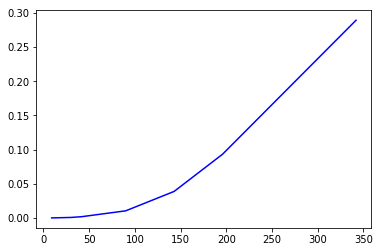

In [37]:
import time
%matplotlib inline
import matplotlib.pyplot as plt


maze_shape = [(3,3),(5,6),(6,7),(9,10),(11,13),(14,14),(18,19)]
poc = [2,4,6,10,18,25,30]
maze_size = list()
greedy_time = list()
for i in range(len(maze_shape)):
    width,height = maze_shape[i]
    _,_,_,maze_graph = maze.generate_maze(width,height,0,True,False,0.5,5,"",0)
    pieces_of_cheese,player1_location,_ = maze.generate_pieces_of_cheese(poc[i], width, height, False, None, None, False)
    start = time.time()
    walk,distance = greedy_function_pyrat_maze(maze_graph,pieces_of_cheese,player1_location)
    greedy_time.append(time.time() - start)
    maze_size.append(width*height)
plt.plot(maze_size,greedy_time,color="blue")